In [1]:
import os
os.getpid()

19584

In [2]:
import sys
sys.executable

'/home/dev2/anaconda3/envs/image_alignment/bin/python3.9'

In [84]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
import PIL

import cv2 as cv

In [6]:
root_path = Path('data/misaligned_images/misaligned_images/')

In [8]:
sample_img_path = root_path / '4.jpg'
assert sample_img_path.exists()

In [10]:
img = cv.imread(str(sample_img_path))

In [15]:
img.shape

(675, 480, 3)

In [102]:
def show_img(img):
    return PIL.Image.fromarray(img)

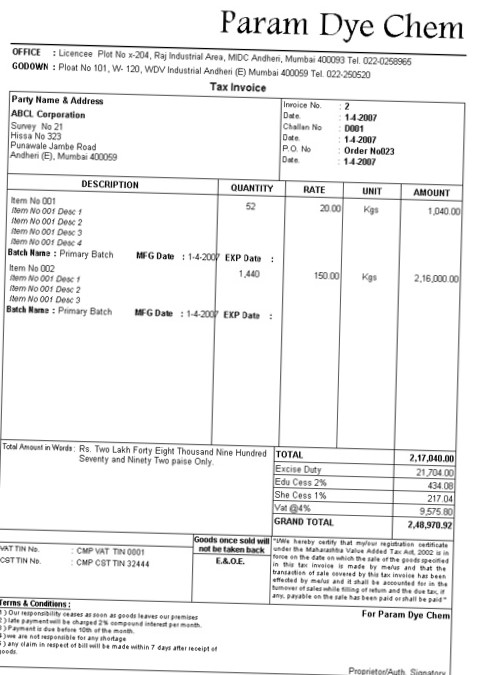

In [104]:
show_img(img)

In [105]:
grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [107]:
grey.shape

(675, 480)

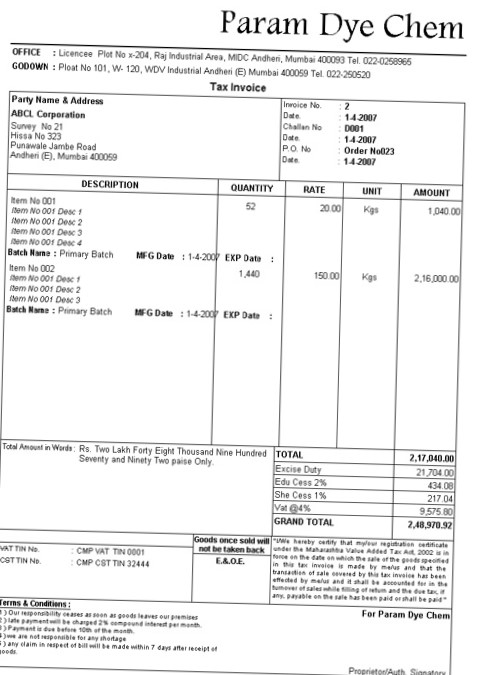

In [106]:
show_img(grey)

In [112]:
(np.invert(grey) == invgrey).all()

True

In [128]:
(np.absolute(grey - 255) == invgrey).all()

False

In [133]:
timg = np.ones((100, 100), dtype=np.int64)
timg = 255
show_img(timg)

AttributeError: 'int' object has no attribute '__array_interface__'

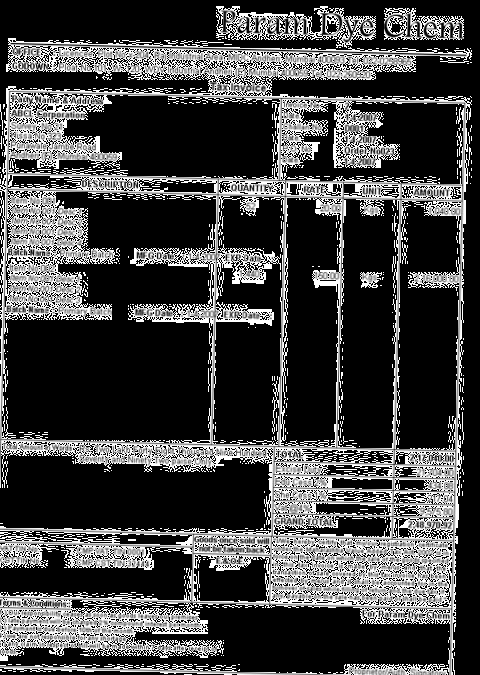

In [130]:
show_img((np.absolute(grey - 255)))

In [114]:
np.bitwise_not(2)

-3

In [122]:
num = 101342

In [123]:
bin(num)

'0b11000101111011110'

In [124]:
bin(np.bitwise_not(num))

'-0b11000101111011111'

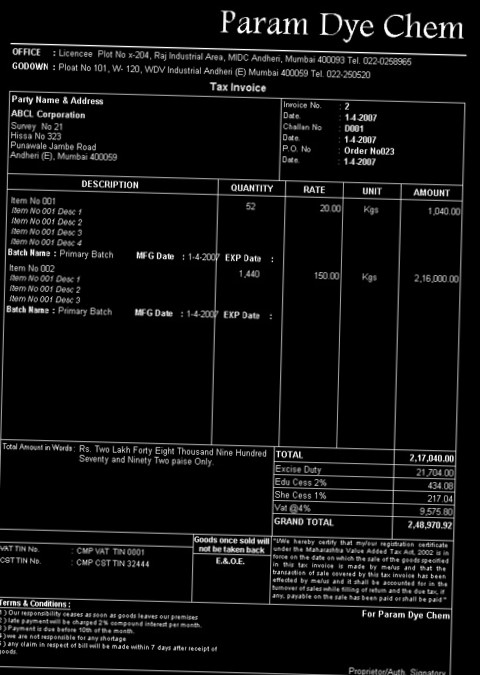

In [76]:
invgrey = cv.bitwise_not(grey)
show_img(invgrey)

In [78]:
help(cv.threshold)

Help on built-in function threshold:

threshold(...)
    threshold(src, thresh, maxval, type[, dst]) -> retval, dst
    .   @brief Applies a fixed-level threshold to each array element.
    .   
    .   The function applies fixed-level thresholding to a multiple-channel array. The function is typically
    .   used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
    .   this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
    .   values. There are several types of thresholding supported by the function. They are determined by
    .   type parameter.
    .   
    .   Also, the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
    .   above values. In these cases, the function determines the optimal threshold value using the Otsu's
    .   or Triangle algorithm and uses it instead of the specified thresh.
    .   
    .   @note Currently, the Otsu's and Triangle methods a

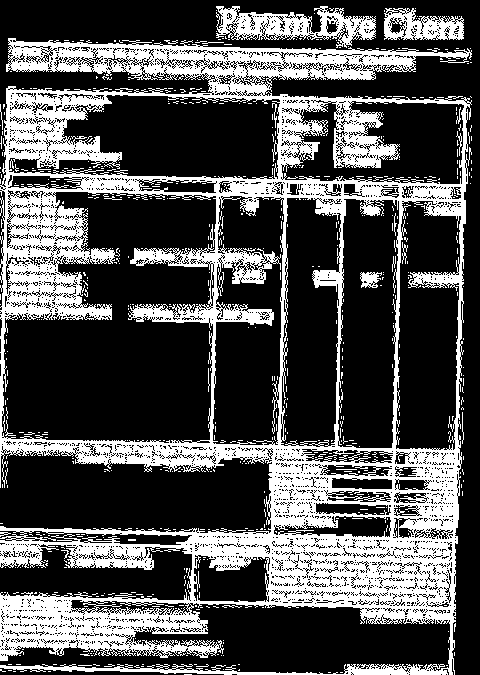

In [83]:
thresh_img = cv.threshold(invgrey, 0, 255, cv.THRESH_BINARY)[1]
show_img(thresh_img)

In [88]:
coords = np.stack(np.where(thresh_img > 0), axis=1)

In [89]:
coords

array([[  6, 216],
       [  6, 217],
       [  6, 218],
       ...,
       [674, 451],
       [674, 452],
       [674, 454]])

In [90]:
angle = cv.minAreaRect(coords)[-1]

In [91]:
angle

90.0

In [92]:
if angle < -45:
    angle = -(90+angle)
else:
    angle = -angle

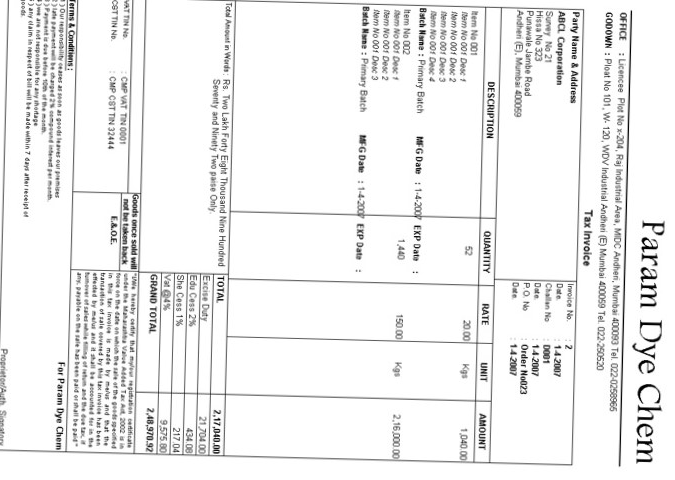

In [99]:
PIL.Image.fromarray(img).rotate(angle, expand=True)